In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
ratings = pd.read_csv('mlp_rsults.csv')

ratings.head()

,V1,V2,V3,V4,V5,V6,V7,V8,PLAYER_NAME,SEASON
0,-2.676725,-1.684318,1.372510,-0.984936,-0.732382,0.957169,3.786516,-1.065350,Kobe Bryant,2015-16
1,-5.005011,-1.469872,2.812594,-0.138972,0.442042,2.604718,4.919799,-2.371491,Tim Duncan,2015-16
2,-6.790344,-0.391086,2.442804,-1.219756,1.005324,3.262189,4.951027,-3.038919,Vince Carter,2015-16
3,-5.464642,-1.383380,3.186098,-0.893453,0.720226,2.510853,6.056474,-4.600045,Dirk Nowitzki,2015-16
4,-4.662435,-2.984523,2.838562,-0.356001,-0.013072,0.976605,3.321974,-2.415907,Elton Brand,2015-16


In [13]:
# Create the empty leaders_df with the correct columns (excluding 'PLAYER_NAME')
leaders_df = pd.DataFrame(columns=[col for col in ratings.columns if col not in ['PLAYER_NAME', 'SEASON']])

# Iterate over all the columns in 'ratings' (excluding 'PLAYER_NAME')
for col in leaders_df.columns:
    # Sort by the current column, in descending order
    leaders = ratings.sort_values(by=col, ascending=False)
    
    # For each leader, store their name and season as a formatted string
    leaders_df[col] = leaders[['PLAYER_NAME', 'SEASON']].apply(
        lambda row: f"{row['PLAYER_NAME']}: {row['SEASON']}", axis=1
    ).values

leaders_df

,V1,V2,V3,V4,V5,V6,V7,V8
0,Nigel Hayes: 2017-18,Jarrett Allen: 2020-21,Bojan Bogdanović: 2016-17,Tyler Herro: 2020-21,Aaron Nesmith: 2024-25,Kyle Anderson: 2024-25,Luke Kornet: 2022-23,Lou Williams: 2019-20
1,Andre Iguodala: 2022-23,DeAndre Jordan: 2022-23,Trey Lyles: 2024-25,Quinn Cook: 2016-17,Josh Hall: 2020-21,Frank Ntilikina: 2020-21,Brandon Knight: 2016-17,Jeff Green: 2024-25
2,LaMarcus Aldridge: 2021-22,Robert Williams III: 2019-20,Evan Fournier: 2016-17,Zach Randolph: 2016-17,Danilo Gallinari: 2021-22,James Wiseman: 2023-24,Damian Lillard: 2024-25,Myles Turner: 2023-24
3,Ja Morant: 2024-25,Vince Williams Jr.: 2024-25,Kevin Durant: 2020-21,Kelly Olynyk: 2018-19,Chris Silva: 2019-20,Wade Baldwin IV: 2016-17,Alex Len: 2018-19,Kyle Kuzma: 2020-21
4,Ivan Rabb: 2018-19,Robert Williams III: 2021-22,Buddy Hield: 2017-18,Trey Lyles: 2020-21,Devin Vassell: 2024-25,Jonathan Isaac: 2019-20,Joe Harris: 2020-21,Rodney Hood: 2019-20
...,...,...,...,...,...,...,...,...
4708,Tre Jones: 2024-25,LeBron James: 2024-25,Treveon Graham: 2019-20,Julius Randle: 2023-24,Jeff Teague: 2020-21,Robert Williams III: 2024-25,Nikola Pekovic: 2015-16,Anthony Davis: 2018-19
4709,Paul Millsap: 2016-17,Dragan Bender: 2018-19,Derrick Jones Jr.: 2017-18,Matt Barnes: 2015-16,Brice Sensabaugh: 2024-25,Aleem Ford: 2021-22,Alexis Ajinca: 2016-17,LeBron James: 2017-18
4710,Damian Lillard: 2022-23,Kelly Olynyk: 2020-21,Terance Mann: 2023-24,Elfrid Payton: 2021-22,Andre Miller: 2015-16,Vince Carter: 2017-18,Donta Hall: 2020-21,Cristiano Felicio: 2017-18
4711,Kristaps Porziņģis: 2022-23,Tobias Harris: 2017-18,Jalen Jones: 2017-18,Richaun Holmes: 2015-16,Tomas Satoransky: 2017-18,Terry Rozier: 2019-20,LaMarcus Aldridge: 2020-21,Jaylin Williams: 2022-23


In [15]:
stat_df = pd.read_csv('synergy_all_playtypes_2015_to_2025.csv')

all_df = pd.merge(stat_df, ratings, on=['PLAYER_NAME', 'SEASON'], how='left')
all_df.shape

/var/folders/d4/c154mt9s11x5q965j91l06qw0000gn/T/ipykernel_49942/2758372455.py:1: DtypeWarning: Columns (184) have mixed types. Specify dtype option on import or set low_memory=False.
  stat_df = pd.read_csv('synergy_all_playtypes_2015_to_2025.csv')


(5585, 193)

In [26]:
# get rid of extra columns
to_delete = ['FGA', 'FGM', 'FGX', 'PERCENTILE', 'POSS', 'PTS', 'GP']
cols_to_delete = []
for col in all_df.columns:

    for i in to_delete:
        if i == col[:len(i)] and 'PCT' not in col:
            cols_to_delete.append(col)

cols_to_delete += ['PLAYER_ID', 'TEAM_ID', 'TYPE_GROUPING']

df = all_df.drop(columns=cols_to_delete)

X = df.drop(columns=['SEASON_ID', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'SEASON', 'position'])
X.columns


Index(['POSS_PCT_Isolation', 'PPP_Isolation', 'FG_PCT_Isolation',
       'FT_POSS_PCT_Isolation', 'TOV_POSS_PCT_Isolation',
       'SF_POSS_PCT_Isolation', 'PLUSONE_POSS_PCT_Isolation',
       'SCORE_POSS_PCT_Isolation', 'EFG_PCT_Isolation', 'POSS_PCT_Transition',
       ...
       'SCORE_POSS_PCT_Misc', 'EFG_PCT_Misc', 'V1', 'V2', 'V3', 'V4', 'V5',
       'V6', 'V7', 'V8'],
      dtype='object', length=107)

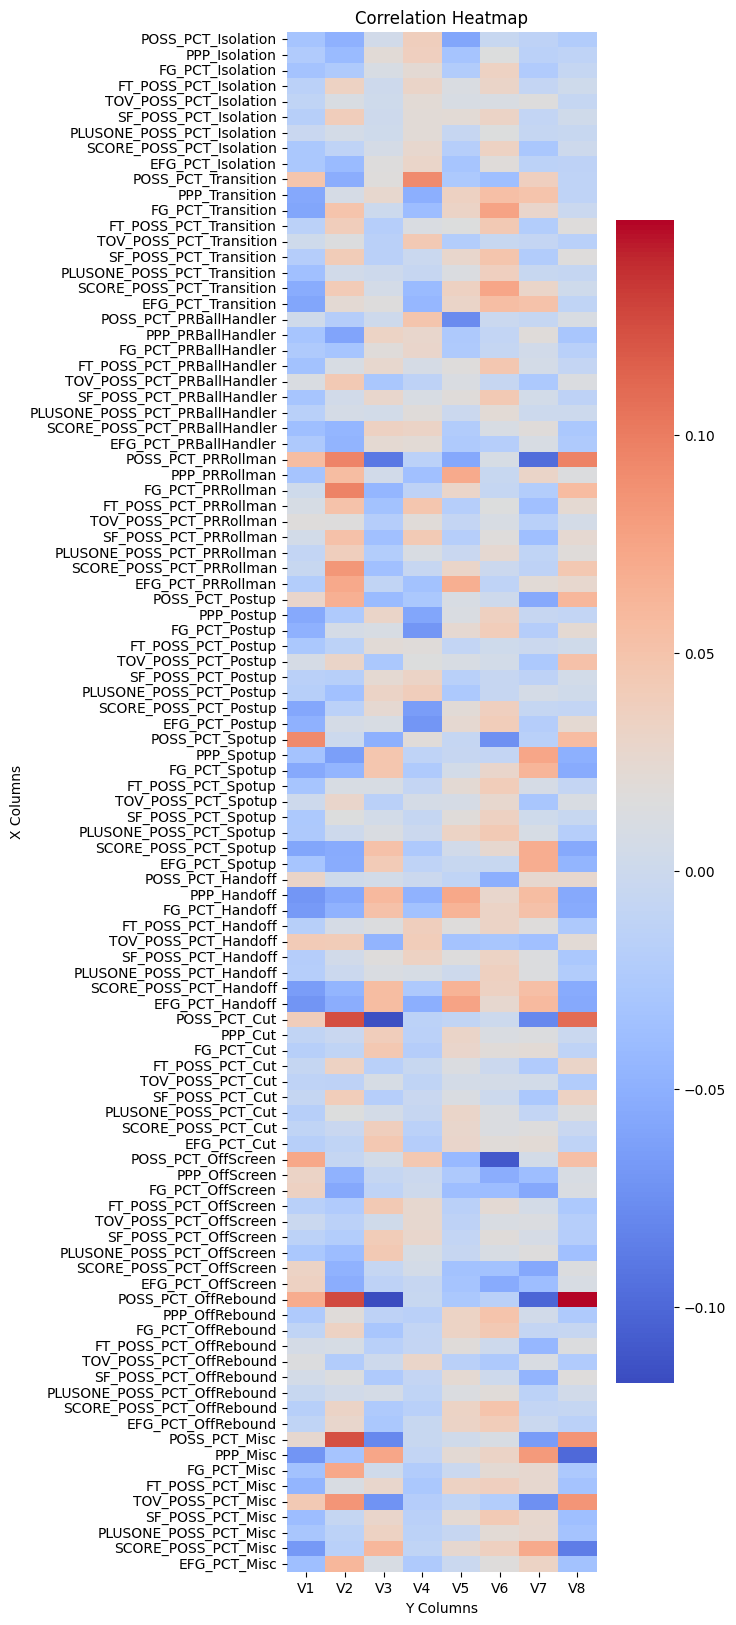

In [39]:
import seaborn as sns
X_cols = [f'V{i}' for i in range(1,9)]
y_cols = [col for col in X.columns if col not in X_cols]

# Compute the correlation matrix between the selected x and y columns
correlation_matrix = df[X_cols + y_cols].corr().loc[y_cols, X_cols]

# Create a heatmap using seaborn
plt.figure(figsize=(5, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", cbar=True)

# Labels and title
plt.title("Correlation Heatmap")
plt.xlabel("Y Columns")
plt.ylabel("X Columns")

# Display the heatmap
plt.show()

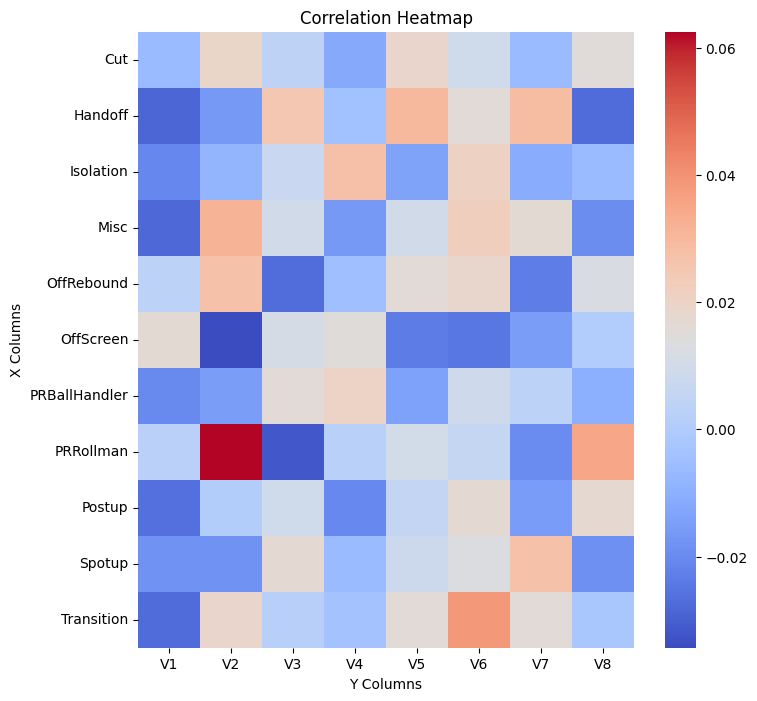

In [42]:
by_playtype = correlation_matrix.copy()
by_playtype.index = by_playtype.index.str.split('_').str[-1]
by_playtype = by_playtype.groupby(by_playtype.index).mean()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(by_playtype, cmap='coolwarm', fmt=".2f", cbar=True)

# Labels and title
plt.title("Correlation Heatmap")
plt.xlabel("Y Columns")
plt.ylabel("X Columns")

# Display the heatmap
plt.show()


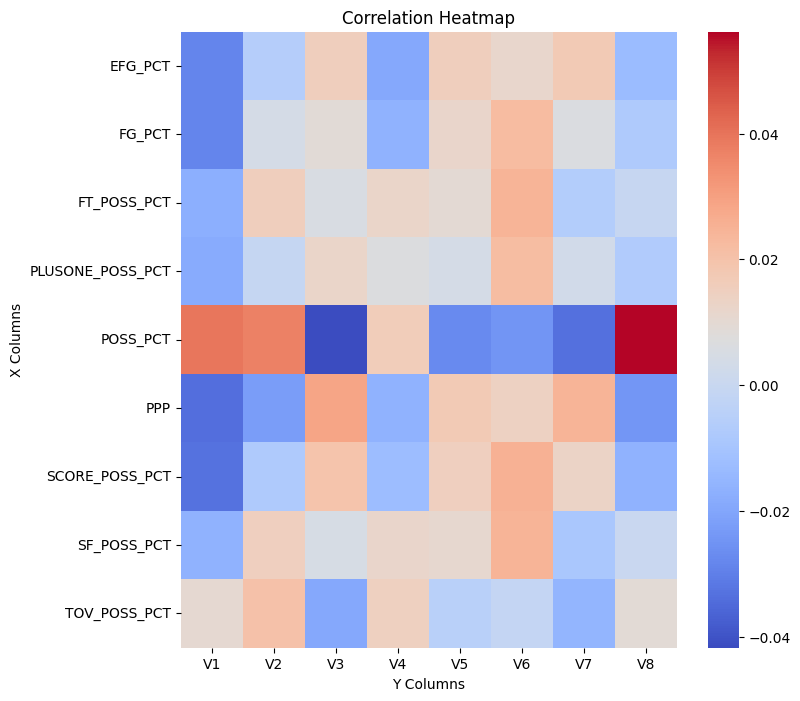

In [46]:
by_stat = correlation_matrix.copy()
by_stat.index = by_stat.index.str.split('_').str[:-1].str.join('_')
by_stat = by_stat.groupby(by_stat.index).mean()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(by_stat, cmap='coolwarm', fmt=".2f", cbar=True)

# Labels and title
plt.title("Correlation Heatmap")
plt.xlabel("Y Columns")
plt.ylabel("X Columns")

# Display the heatmap
plt.show()

['F', 'G', 'C-F', 'F-C', 'G-F', 'C', 'F-G']
F
(127, 8)


/var/folders/d4/c154mt9s11x5q965j91l06qw0000gn/T/ipykernel_49942/2439405104.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_df[X_cols] = normalize(position_df[X_cols])


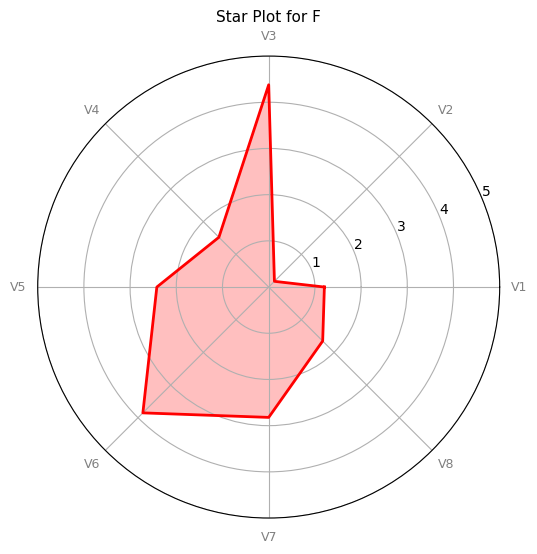

G
(196, 8)


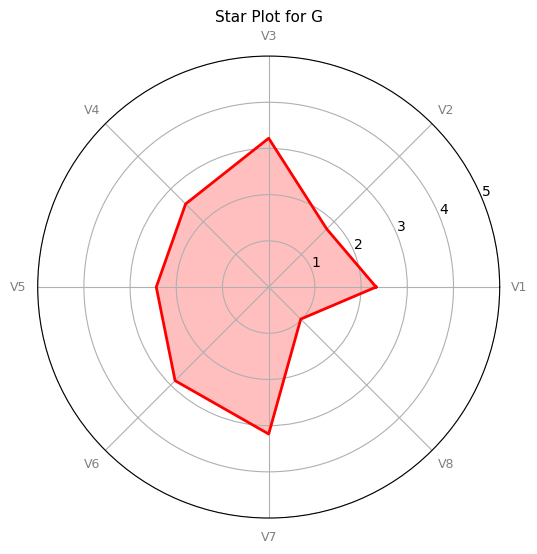

C-F
(18, 8)


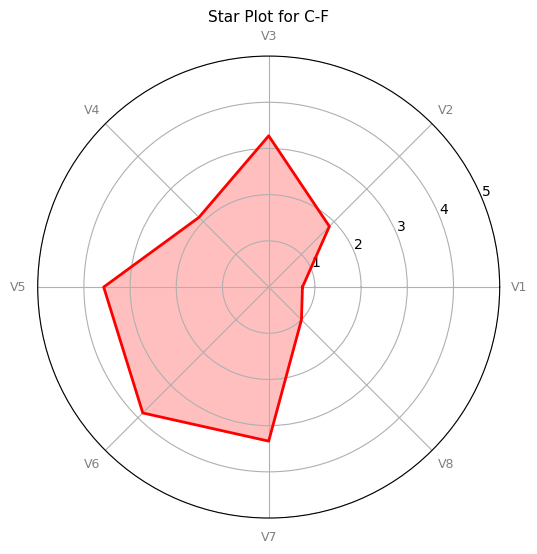

F-C
(35, 8)


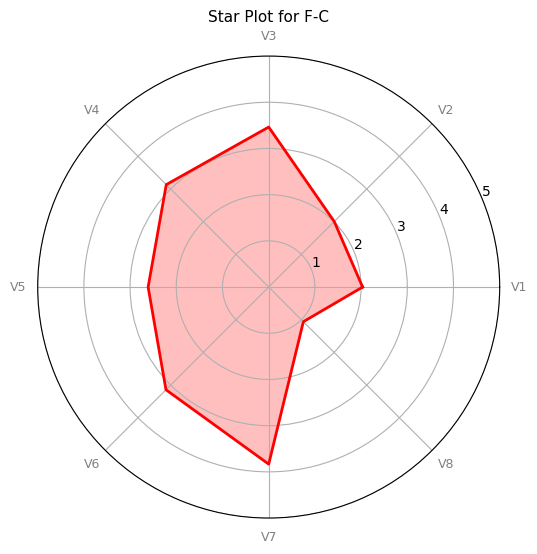

G-F
(37, 8)


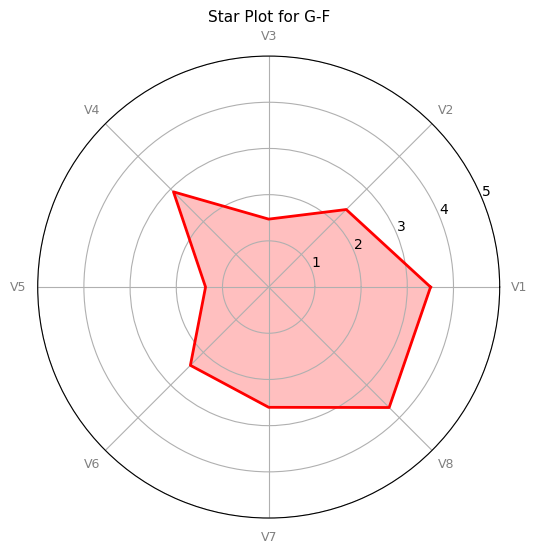

C
(46, 8)


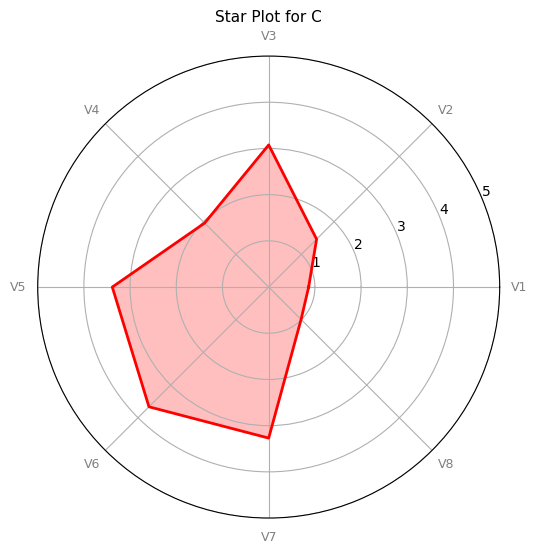

F-G
(18, 8)


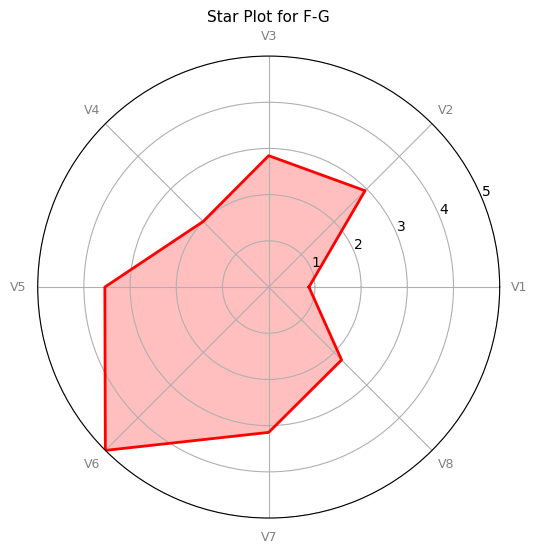

In [64]:

position_df = all_df[['position']+X_cols]
position_df.groupby('position').mean()

# normalize columns on a scale of 0 to 5
def normalize(df):
    return (df - df.min()) / (df.max() - df.min()) * 5
position_df[X_cols] = normalize(position_df[X_cols])

def plot_star_chart(data, title):
    num_vars = len(data.columns)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    # Get values and complete the loop
    values = data.iloc[0].tolist()
    values += values[:1]

    # Plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='red', alpha=0.25)
    ax.plot(angles, values, color='red', linewidth=2)

    # Labels and grid
    plt.xticks(angles[:-1], data.columns, color='grey', size=9)
    ax.set_ylim(0, 5)
    ax.yaxis.grid(True)
    plt.title(title, size=11)
    plt.show()


# Create a radar chart for each position
positions = [pos for pos in position_df['position'].unique() if isinstance(pos, str)]
print(positions)
for position in positions:
    data = position_df[position_df['position'] == position].drop(columns=['position'])
    print(position)
    print(data.shape)
    plot_star_chart(data, f"Star Plot for {position}")


/var/folders/d4/c154mt9s11x5q965j91l06qw0000gn/T/ipykernel_49942/3252397434.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(data))


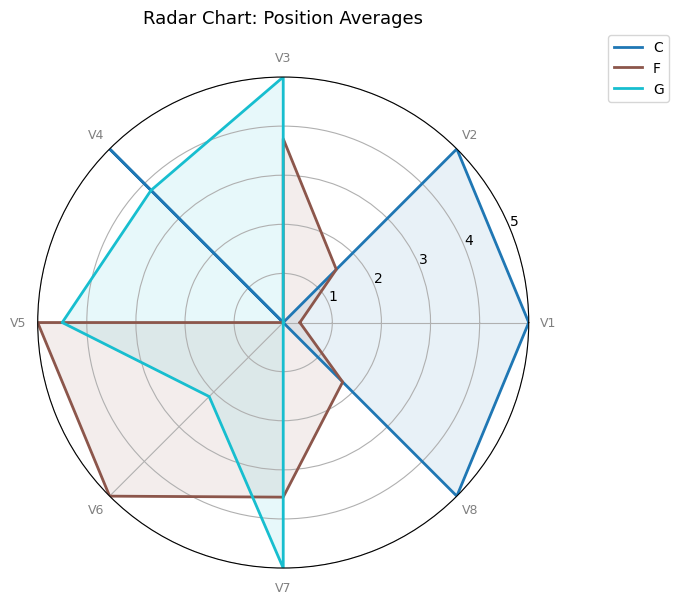

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


pos_df = all_df[all_df['position'].isin(['G', 'F', 'C'])]
# Group and normalize
position_df = pos_df[['position'] + X_cols]
grouped = position_df.groupby('position').mean()

# Normalize to 0–5
def normalize(df):
    return (df - df.min()) / (df.max() - df.min()) * 5

grouped[X_cols] = normalize(grouped[X_cols])

# Radar chart for all positions
def plot_star_chart_all(data, title):
    labels = data.columns.tolist()
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # complete the loop

    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

    colors = plt.cm.get_cmap('tab10', len(data))

    for i, (index, row) in enumerate(data.iterrows()):
        values = row.tolist()
        values += values[:1]  # complete the loop
        ax.plot(angles, values, label=index, color=colors(i), linewidth=2)
        ax.fill(angles, values, color=colors(i), alpha=0.1)

    # Labels and styling
    plt.xticks(angles[:-1], labels, color='grey', size=9)
    ax.set_ylim(0, 5)
    ax.yaxis.grid(True)
    ax.set_title(title, size=13, pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()

# Plot
plot_star_chart_all(grouped[X_cols], "Radar Chart: Position Averages")
